In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import warnings
warnings.simplefilter('ignore')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

# Business Understanding


## Overview
Adidas, a leading global sportswear brand, aims to enhance customer engagement and drive sales in Great Britain by leveraging data-driven strategies. The company recognizes the need to better understand its diverse customer base and provide personalized experiences that cater to individual preferences. This project focuses on developing a customer segmentation and recommendation system that will allow Adidas to deliver tailored product recommendations based on the specific sports categories that customers are interested in.

## Problem Statement 
With a vast and diverse customer base in Great Britain, Adidas faces the challenge of effectively engaging with its customers across different sports categories. The current approach lacks the granularity needed to provide personalized experiences, leading to missed opportunities for increasing customer loyalty and driving sales. There is a need for a system that can accurately segment customers and deliver relevant product recommendations that resonate with their interests and behaviors.


## Challenges
1. Customer Segmentation: Develop a robust segmentation model that categorizes customers based on their purchasing behavior, particularly focusing on the sports categories they engage with.

2. Personalized Recommendations: Build a recommendation system that suggests products aligned with the identified customer segments, enhancing the shopping experience and driving sales.

3. Integration and Deployment: Integrate the recommendation system with a customer-facing platform, such as a website, ensuring seamless interaction and personalized user experiences.

4. Scalability: Ensure that the system is scalable to handle the diverse range of products and customer behaviors across all of Adidas's offerings.

## Proposed Solution
1. Data Integration: Combine customer demographic, sales, and engagement data to create a comprehensive dataset that captures all relevant information for segmentation and recommendations.

2. Customer Segmentation: Utilize machine learning techniques to segment customers based on the sports categories they purchase from, along with other relevant factors such as age, gender, and engagement scores.

3. Recommendation System: Implement a hybrid recommendation system that combines collaborative filtering and content-based filtering to provide personalized product recommendations for each customer segment.

4. Deployment: Develop a Flask API to serve the recommendation engine and integrate it with a customer-facing platform, such as a website, for real-time interaction with users.

## Success Metrics 
1. Model Accuracy: Maintain an overall model accuracy rate of 80% or higher in predicting user preferences.

2. Functional Storefront: Ensure the website accurately simulates a real e-commerce platform, showcasing product recommendations with names and descriptions.

3. Model Integration: Successfully integrate the recommendation model into the website, allowing it to dynamically generate and display personalized product suggestions for each user.


## Conclusion
By focusing on customer segmentation based on sports categories and providing personalized product recommendations, Adidas can significantly enhance customer engagement and drive sales in Great Britain. This project aims to build a scalable and accurate system that not only improves the shopping experience for customers but also provides valuable insights into customer behavior, enabling Adidas to tailor its marketing and product strategies more effectively.



# Data Understanding

## Data sources 
There are three datasets that will be used:
- (ConsTable_EU.csv), that contains consumer information.

- (SalesTable_EU.csv), that contains Sales information.

- (EngagementTable_GB.csv) that contains data on customer engagement for Great Britain.

In [2]:
# Load all datasets
cons_eu = pd.read_csv('data/ConsTable_EU.csv')
sales_eu = pd.read_csv('data/SalesTable_EU.csv')
engagement_gb = pd.read_csv('data/EngagementTable_GB.csv')


In [3]:
# Consumer Information
print('Consumer Information'.center(50, '-'))
print(f'Shape: {cons_eu.shape}')
print(f'Info:\n{cons_eu.info()}')
print(f'Description:\n{cons_eu.describe()}')

print('\n' + '-'*50 + '\n')

# Sales
print('Sales'.center(50, '-'))
print(f'Shape: {sales_eu.shape}')
print(f'Info:\n{sales_eu.info()}')
print(f'Description:\n{sales_eu.describe()}')

print('\n' + '-'*50 + '\n')

# Engagement Data
print('Engagement Data'.center(50, '-'))
print(f'Shape: {engagement_gb.shape}')
print(f'Info:\n{engagement_gb.info()}')
print(f'Description:\n{engagement_gb.describe()}')

---------------Consumer Information---------------
Shape: (355461, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355461 entries, 0 to 355460
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   acid                       355461 non-null  object 
 1   loyalty_memberid           266450 non-null  object 
 2   birth_year                 133642 non-null  float64
 3   consumer_gender            355461 non-null  object 
 4   market_name                355461 non-null  object 
 5   first_signup_country_code  355461 non-null  object 
 6   member_latest_tier         266335 non-null  object 
 7   member_latest_points       266335 non-null  float64
dtypes: float64(2), object(6)
memory usage: 21.7+ MB
Info:
None
Description:
          birth_year  member_latest_points
count  133642.000000         266335.000000
mean     1987.942346            150.370961
std        13.421753           1241.023133
m

 1. **Consumer Information**
- **Shape**: (355,461 rows, 8 columns)
- **Key Columns**:
  - `acid`: Unique identifier for each consumer (non-null).
  - `loyalty_memberid`: Membership ID (missing for about 25% of consumers).
  - `birth_year`: Year of birth (available for about 38% of consumers).
  - `consumer_gender`, `market_name`, `first_signup_country_code`: Demographic and location data.
  - `member_latest_tier`, `member_latest_points`: Loyalty program data, available for around 75% of consumers.
- **Notable Statistics**:
  - `birth_year`: Average year of birth is ~1988, with a range from 1882 to 2009.
  - `member_latest_points`: Points range widely, with some negative values and a max of 377,850.4 points.

 2. **Sales Data**
- **Shape**: (178,334 rows, 20 columns)
- **Key Columns**:
  - `acid`, `order_no`, `order_date`: Order identifiers and dates (non-null).
  - `market_name`, `country`: Geographic data.
  - `quantity_ordered`, `quantity_returned`, `quantity_cancelled`, `quantity_delivered`: Metrics on order fulfilment.
  - `exchange_rate_to_EUR`, `order_item_unit_price_net`: Financial data related to orders.
- **Notable Statistics**:
  - `quantity_ordered`: Average slightly above 1 item per order.
  - `quantity_returned`: 21% of items are returned on average.
  - `order_item_unit_price_net`: Prices range from -€45.76 to €14,628.10, indicating some anomalies.

 3. **Engagement Data**
- **Shape**: (33,148 rows, 29 columns)
- **Key Columns**:
  - `acid`: Consumer ID.
  - `year`, `quarter_of_year`, `month_of_year`, `week_of_year`: Temporal data for tracking engagement.
  - Various `freq_*` columns: Metrics capturing the frequency of consumer interactions (e.g., signups, app usage, purchases).
- **Notable Statistics**:
  - `freq_signup`, `freq_sportsapp`, `freq_email`, etc.: Majority of engagement metrics have low averages, indicating most consumers interact sporadically.
  - `freq_dotcom`, `freq_flagshipapp`: Show more consistent engagement, with some consumers interacting very frequently (e.g., up to 399 times on the flagship app).


# DATA PREPARATION

In [4]:
# Accessing GB Data from Cons_eu and Sale_eu

cons_gb = cons_eu[cons_eu['first_signup_country_code'] == 'GB']
sales_gb = sales_eu[sales_eu['country'] == 'GB']

In [5]:
cons_gb

,acid,loyalty_memberid,birth_year,consumer_gender,market_name,first_signup_country_code,member_latest_tier,member_latest_points
1,H24SNEP4HNBA6KVC,NaN,NaN,Unknown,Western Europe,GB,NaN,NaN
2,OUU8CGXKA9WIL7LW,NaN,NaN,Unknown,Western Europe,GB,NaN,NaN
4,LTZVC7YMPXJGLKOW,92D6786B8DB74C2984E382B5E99F5C393588563F269F62...,NaN,Male,Western Europe,GB,Level 1,0.0
8,LVCIKJXEH56NKV7A,29B11577BABDB20529C1D400FDC621824C83D6256F96D4...,NaN,Unknown,Western Europe,GB,Level 1,0.0
10,Z1AOUCZ2VG2FQ3UQ,5E00B3036468BEDCAA8BDAEEAAC9CFC2BAEAF4C09F4267...,NaN,Unknown,Western Europe,GB,Level 1,0.0
...,...,...,...,...,...,...,...,...
355440,UT1RW39PZACT2BD3,NaN,NaN,Unknown,Western Europe,GB,NaN,NaN
355442,PDQUJIFM3L6HPOPM,NaN,NaN,Unknown,Western Europe,GB,NaN,NaN
355444,1TQICCC4WUN38C9B,DBAD013F2B8C5E2593CD88E51A492B1A3E5D24918EC297...,NaN,Male,Western Europe,GB,Level 1,0.0
355446,C8ZGDRZN28M5N7SA,40663F074DC4CC74E8AAF58468A07BB1894B7A4A71EF41...,NaN,Male,Western Europe,GB,Level 1,0.0


In [6]:
sales_gb

,acid,order_no,order_date,market_name,country,article_no,key_category_descr,sports_category_descr,product_division,product_type,product_age_group,product_gender,quantity_ordered,quantity_returned,quantity_cancelled,quantity_delivered,no_of_items_after_returns,currency,exchange_rate_to_EUR,order_item_unit_price_net
1,LE9L3EOB8US4OCNM,AUK51130901,2022-06-09 00:00:00+00:00,Western Europe,GB,HB6519,TRAINING APP,TRAINING,APPAREL,SHORTS,ADULT,MEN,7,0,0,7,7,GBP,1.176471,12.537143
13,XNHKABE0B9HBQ9UB,AUK58840020,2022-11-26 00:00:00+00:00,Western Europe,GB,GZ0619,RUNNING FTW,RUNNING,FOOTWEAR,SHOES (LOW),ADULT,WOMEN,1,0,0,1,1,GBP,1.176471,44.380000
14,BQPEN1MTYSPZ8UJI,AUK55004486,2022-09-02 00:00:00+00:00,Western Europe,GB,HL9057,ORIGINALS APP,ORIGINALS,APPAREL,SWEATSHIRT,ADULT,WOMEN,1,0,0,1,1,GBP,1.176471,44.330000
15,LB5Q806DN5B2C34V,AUK53592920,2022-07-31 00:00:00+00:00,Western Europe,GB,GW2962,ORIGINALS FTW,ORIGINALS,FOOTWEAR,SHOES (LOW),ADULT,MEN,1,0,0,1,1,GBP,1.176471,54.160000
16,YFRSHW5AXP0F1VC3,AUK58715695,2022-11-25 00:00:00+00:00,Western Europe,GB,GN1990,TRAINING ACC HW,NOT SPORTS SPECIFIC,ACCESSORIES/HARDWARE,CAP,ADULT,MEN,1,0,0,1,1,GBP,1.176471,4.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178322,5DTX7N77YSTINSR3,AUK58640550,2022-11-24 00:00:00+00:00,Western Europe,GB,GX9527,ORIGINALS FTW,ORIGINALS,FOOTWEAR,SHOES (LOW),ADULT,MEN,1,0,0,1,1,GBP,1.176471,61.100000
178326,Z6J9Z1BLG8C8EMY0,AUK58954873,2022-11-27 00:00:00+00:00,Western Europe,GB,HF1488,FOOTBALL APP LICENSED,FOOTBALL/SOCCER,APPAREL,JERSEY,JUNIOR,KIDS,1,0,1,0,0,GBP,1.176471,50.000000
178329,57U8ESPG67OD3YZW,AUK50152075,2022-05-10 00:00:00+00:00,Western Europe,GB,GW8731,SPORTSWEAR FTW KIDS,RUNNING,FOOTWEAR,SHOES (LOW),KIDS,KIDS,1,1,0,1,0,GBP,1.176471,29.750000
178330,8E5RYMR4XQ6IK8O4,AUK47690042,2022-03-06 00:00:00+00:00,Western Europe,GB,H09117,ORIGINALS APP,ORIGINALS,APPAREL,TRACK PANT,ADULT,MEN,1,1,0,1,0,GBP,1.176471,40.830000


In [7]:
engagement_gb

,acid,country,year,quarter_of_year,month_of_year,week_of_year,freq_signup,freq_sportsapp,freq_survey,freq_raffle,...,freq_confirmed,freq_dotcom,freq_flagshipapp,freq_hype,freq_pdp,freq_plp,freq_add_to_cart,freq_preference,freq_wishlist,refresh_date
0,W884Q2CXMZIUPJAY,GB,2022,4,10,43,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2024-03-04
1,SK35CN4PN3D8BSQ5,GB,2022,4,11,44,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2024-03-04
2,PEFUFIL9L91LWRCH,GB,2022,4,11,44,0,0,0,0,...,0,0,1,0,1,1,0,0,0,2024-03-04
3,L3C6LK6TNPV7TU4T,GB,2022,4,10,43,0,0,0,0,...,0,0,4,0,4,4,0,0,0,2024-03-04
4,ZLJNMTPZ5A03AEYN,GB,2022,4,10,41,0,0,0,0,...,0,0,18,0,3,15,0,0,0,2024-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33143,IESJHC6LUJOAXD06,GB,2022,4,10,42,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2024-03-04
33144,EJ1306ROWJ5K7XF3,GB,2022,4,10,40,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2024-03-04
33145,BUARMZA5098MXY54,GB,2022,4,11,47,0,0,0,0,...,0,0,2,0,2,0,2,0,2,2024-03-04
33146,KU52VB7B0C15I26S,GB,2022,4,12,51,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2024-03-04


In [8]:
# null values for each dataset
print(cons_gb.isnull().sum())

acid                             0
loyalty_memberid             18169
birth_year                   58280
consumer_gender                  0
market_name                      0
first_signup_country_code        0
member_latest_tier           18169
member_latest_points         18169
dtype: int64


In [9]:
#Fill missing loyalty data with 'Non-member'
cons_gb['loyalty_memberid'].fillna('Non-member', inplace=True)
cons_gb['member_latest_tier'].fillna('Non-member', inplace=True)
cons_gb['member_latest_points'].fillna(0, inplace=True)

#Filling missing birth_year with median age
median_birth_year = cons_gb['birth_year'].median()
cons_gb['birth_year'].fillna(median_birth_year, inplace=True)

#Convert birth_year to age
current_year = 2022
cons_gb['age'] = current_year - cons_gb['birth_year']

#Drop birth year column
cons_gb.drop('birth_year', axis=1, inplace=True)

In [10]:
# Checking null values
print(cons_gb.isnull().sum())

acid                         0
loyalty_memberid             0
consumer_gender              0
market_name                  0
first_signup_country_code    0
member_latest_tier           0
member_latest_points         0
age                          0
dtype: int64


In [11]:
# Checking for duplicates
print(cons_gb.duplicated().sum())

0


In [12]:
#Check for null values in the sales data
print(sales_gb.isnull().sum())

acid                          0
order_no                      0
order_date                    0
market_name                   0
country                       0
article_no                    0
key_category_descr            0
sports_category_descr         0
product_division              0
product_type                  0
product_age_group             0
product_gender                0
quantity_ordered              0
quantity_returned             0
quantity_cancelled            0
quantity_delivered            0
no_of_items_after_returns     0
currency                      0
exchange_rate_to_EUR          0
order_item_unit_price_net    23
dtype: int64


In [13]:
#Filling the misssing values with the median
sales_gb['order_item_unit_price_net'].fillna(sales_gb['order_item_unit_price_net'].median(),inplace=True)

In [14]:
#Checking null value
print(sales_gb.isnull().sum())

acid                         0
order_no                     0
order_date                   0
market_name                  0
country                      0
article_no                   0
key_category_descr           0
sports_category_descr        0
product_division             0
product_type                 0
product_age_group            0
product_gender               0
quantity_ordered             0
quantity_returned            0
quantity_cancelled           0
quantity_delivered           0
no_of_items_after_returns    0
currency                     0
exchange_rate_to_EUR         0
order_item_unit_price_net    0
dtype: int64


In [15]:
#Checking duplicates
print(sales_gb.duplicated().sum())

0


In [16]:
#Checking for missing values in Engagement data
print(engagement_gb.isnull().sum())

acid                       0
country                    0
year                       0
quarter_of_year            0
month_of_year              0
week_of_year               0
freq_signup                0
freq_sportsapp             0
freq_survey                0
freq_raffle                0
freq_reviews               0
freq_email                 0
freq_adiclub_email         0
freq_pn                    0
freq_adiclub_pn            0
freq_transactions          0
freq_earn_points           0
freq_points_redemption     0
freq_rewards_redemption    0
freq_confirmed             0
freq_dotcom                0
freq_flagshipapp           0
freq_hype                  0
freq_pdp                   0
freq_plp                   0
freq_add_to_cart           0
freq_preference            0
freq_wishlist              0
refresh_date               0
dtype: int64


In [17]:
#Checking duplicates
print(engagement_gb.duplicated().sum())

0


# Exploratory Data Analysis

## Univariate Analysis
#####    Consumer data


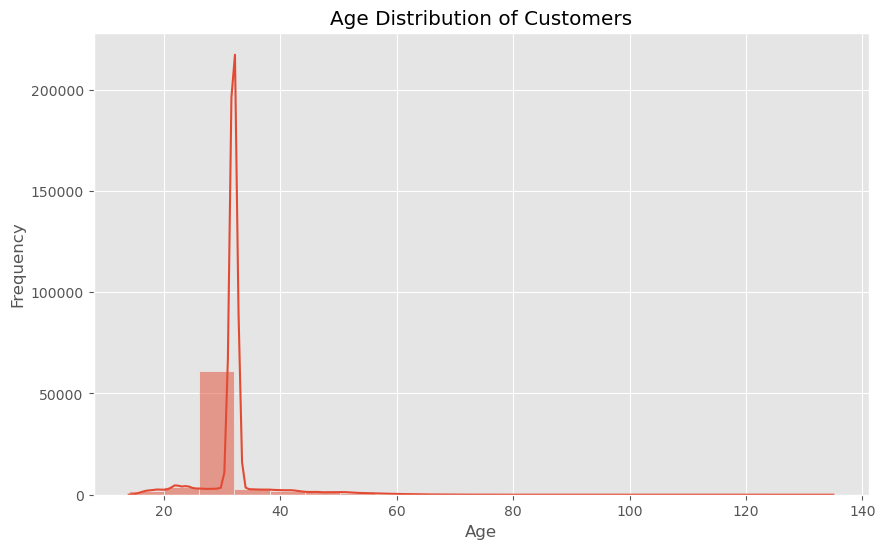

In [18]:
# Distribution of age 
plt.figure(figsize=(10, 6))
sns.histplot(cons_gb['age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The vast majority of customers are younger adults, likely between 20 and 30 years old. This could imply that the brand has a strong appeal to a younger demographic. The presence of customers aged over 100 suggests possible issues with data quality. It might be beneficial to clean the data by removing or investigating these outliers. Marketing strategies should focus on appealing to younger consumers, who form the bulk of our customer base.

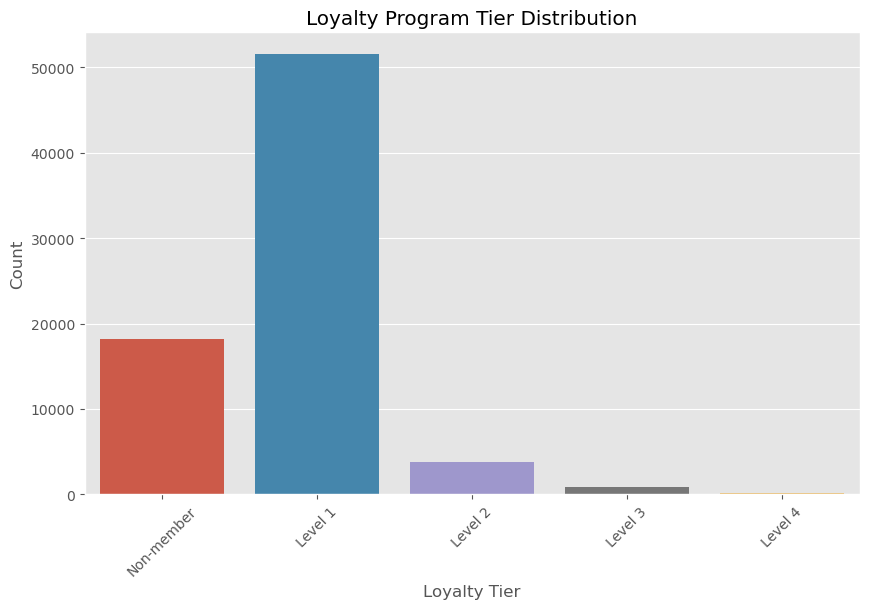

In [19]:
# Loyalty program membership distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='member_latest_tier', data=cons_gb)
plt.title('Loyalty Program Tier Distribution')
plt.xlabel('Loyalty Tier')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The sharp drop in the number of customers from "Level 1" to "Level 2" suggests that many customers do not advance beyond the initial level. This could imply that customers are either not incentivized enough to move up the loyalty tiers or that the requirements to advance are too stringent.
There is a significant portion of the customer base that is not part of the loyalty program. Strategies could be developed to convert these non-members into members, potentially increasing their engagement with the brand.
The very low numbers in "Level 3" and "Level 4" suggest that maintaining customer loyalty and engagement at these higher levels might be challenging. This could be an area for further analysis and strategy development to encourage more customers to progress through the tiers.
The current distribution might indicate that the loyalty program is effective at bringing in new members (as seen by the high numbers at "Level 1"), but there may be challenges in retaining and progressing these members through higher levels.

- Correlation Matrix

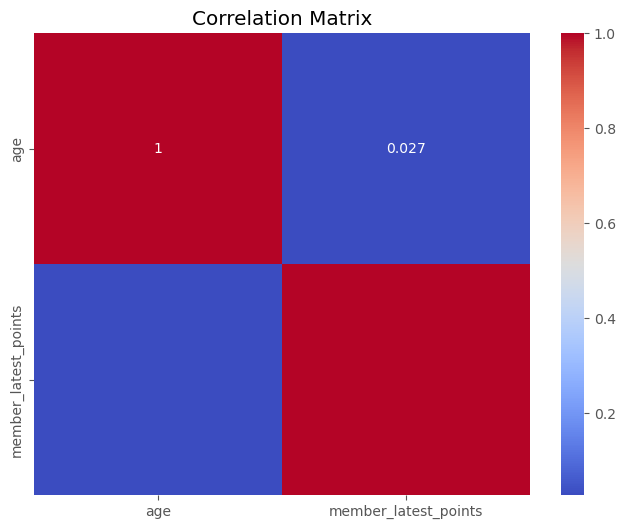

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cons_gb[['age', 'member_latest_points']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The very low correlation coefficient between age and member_latest_points suggests that a customer's age does not significantly influence the number of points they have in the loyalty program. This means that both younger and older customers tend to accumulate points at similar rates, and age is not a predictor of engagement or spending behavior in this context. Given the low correlation, age and member points can be considered largely independent in this dataset.

#####  Sales Data

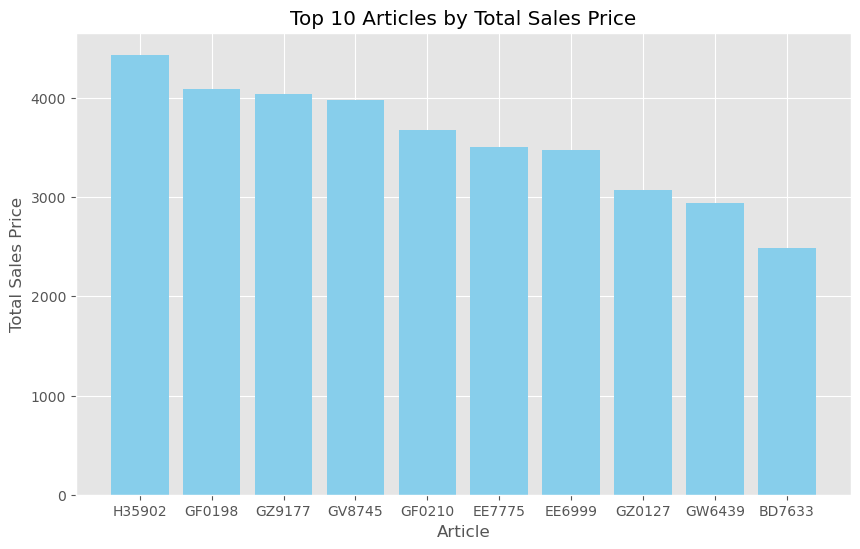

In [21]:
grouped_sales_gb = sales_gb.groupby('article_no').sum()

# Calculate the top 10 articles by total sales price: top_10_articles
top_10_articles = grouped_sales_gb.sort_values(by='order_item_unit_price_net', ascending=False).head(10)

# Plot the top 10 articles by total sales price
plt.figure(figsize=(10,6))
plt.bar(top_10_articles.index, top_10_articles['order_item_unit_price_net'], color='skyblue')
plt.xlabel('Article')
plt.ylabel('Total Sales Price')
plt.title('Top 10 Articles by Total Sales Price')
plt.show()

The chart indicates that a few articles generate the majority of sales revenue. The top articles like Men's football/soccer jersey, Men's Track top, and men's footwear are likely high-demand products.
This concentration of sales in a few products could suggest that these articles are either best-sellers due to their popularity, quality, or perhaps successful marketing campaigns.
Given the high sales volumes for these top articles, ensuring that these items are well-stocked and available could be crucial for maintaining sales momentum.
Conversely, analyzing why the lower-ranked articles are still in the top 10 but lag behind could reveal opportunities for optimization, such as targeted promotions or pricing strategies.
You might want to focus on these top articles when designing marketing strategies, special promotions, or product bundles since they are proven revenue drivers.

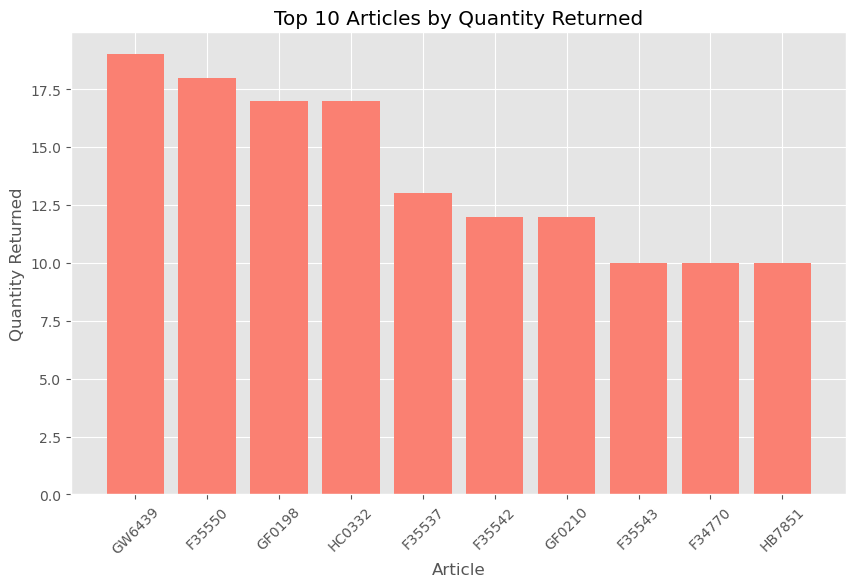

In [22]:
# Calculate the top 10 articles by quantity_returned: top_10_article_returns
top_10_article_returns = grouped_sales_gb.sort_values(by='quantity_returned', ascending=False).head(10)

# Plot the top 10 articles by quantity_returned
plt.figure(figsize=(10,6))
plt.bar(top_10_article_returns.index, top_10_article_returns['quantity_returned'], color='salmon')
plt.xlabel('Article')
plt.ylabel('Quantity Returned')
plt.title('Top 10 Articles by Quantity Returned')
plt.xticks(rotation=45)
plt.show()

The articles with the highest return rates might have quality issues, sizing problems, or other factors leading customers to return them. It's crucial to investigate why these specific articles have higher return rates.

High returns can indicate customer dissatisfaction, which can negatively impact brand reputation and profitability. The top-returned articles might be candidates for a closer examination to identify and address any underlying issues.

For articles like Kid's running shoes and Men's swimming slides, understanding the reasons behind the high return rates could provide insights into necessary product improvements, whether it’s related to product quality, size accuracy, or customer expectations.


Managing returns is costly. Identifying patterns in returned products can help in reducing return rates, optimizing logistics, and improving overall customer satisfaction.

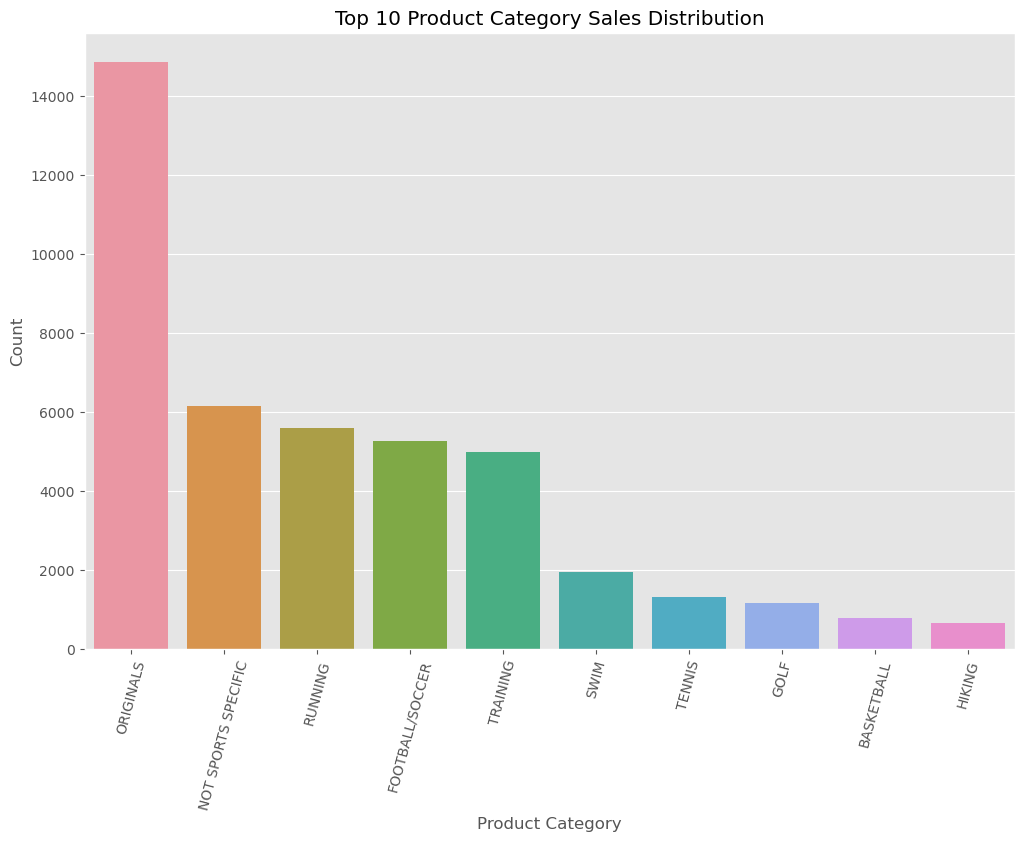

In [23]:
# Count the occurrences of each product category
top_product_categories = sales_gb['sports_category_descr'].value_counts().nlargest(10)

# Filter the sales_table to only include rows with these top categories
filtered_sales_table = sales_gb[sales_gb['sports_category_descr'].isin(top_product_categories.index)]

# Plot the distribution of the top 10 product categories
plt.figure(figsize=(12, 8))
sns.countplot(x='sports_category_descr', data=filtered_sales_table, order=top_product_categories.index)
plt.title('Top 10 Product Category Sales Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

The "ORIGINALS" category is the most dominant, suggesting that products in this category have a broad appeal, potentially across various demographics. This could be due to its association with lifestyle and fashion rather than specific sports.

"RUNNING" and "FOOTBALL/SOCCER" are the most popular sports-specific categories. This aligns with the high interest and participation in these activities globally, particularly football (soccer) in Europe.

The clear difference in sales volume across categories highlights opportunities for targeted marketing. For instance, while categories like "ORIGINALS" might benefit from broader, lifestyle-focused campaigns, more niche categories like "TENNIS" or "GOLF" may require specialized marketing strategies to reach their specific audiences.

Categories with lower sales counts, such as "HIKING" or "BASKETBALL," might have potential for growth. Understanding why these categories lag behind (e.g., limited product offerings, less marketing focus, or niche audience) could provide insights for strategic development.

#####  Engagement Data

In [24]:
# Feature Engineering Engagement Data to get Engagement Score
engagement_gb['engagement_score'] = engagement_gb['freq_signup'] + engagement_gb['freq_sportsapp'] + engagement_gb['freq_survey'] + engagement_gb['freq_raffle'] + engagement_gb['freq_reviews'] + engagement_gb['freq_email'] + engagement_gb['freq_adiclub_email'] +engagement_gb['freq_pn'] + engagement_gb['freq_adiclub_pn'] + engagement_gb['freq_transactions'] + engagement_gb['freq_earn_points'] +engagement_gb['freq_points_redemption'] + engagement_gb['freq_rewards_redemption'] + engagement_gb['freq_confirmed'] + engagement_gb['freq_dotcom'] +engagement_gb['freq_flagshipapp'] + engagement_gb['freq_hype'] + engagement_gb['freq_pdp'] + engagement_gb['freq_plp'] + engagement_gb['freq_add_to_cart'] +engagement_gb['freq_preference'] + engagement_gb['freq_wishlist']

In [25]:
engagement_gb.head()

,acid,country,year,quarter_of_year,month_of_year,week_of_year,freq_signup,freq_sportsapp,freq_survey,freq_raffle,...,freq_dotcom,freq_flagshipapp,freq_hype,freq_pdp,freq_plp,freq_add_to_cart,freq_preference,freq_wishlist,refresh_date,engagement_score
0,W884Q2CXMZIUPJAY,GB,2022,4,10,43,0,0,0,0,...,1,0,0,0,0,0,0,0,2024-03-04,3
1,SK35CN4PN3D8BSQ5,GB,2022,4,11,44,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-04,2
2,PEFUFIL9L91LWRCH,GB,2022,4,11,44,0,0,0,0,...,0,1,0,1,1,0,0,0,2024-03-04,3
3,L3C6LK6TNPV7TU4T,GB,2022,4,10,43,0,0,0,0,...,0,4,0,4,4,0,0,0,2024-03-04,12
4,ZLJNMTPZ5A03AEYN,GB,2022,4,10,41,0,0,0,0,...,0,18,0,3,15,0,0,0,2024-03-04,36


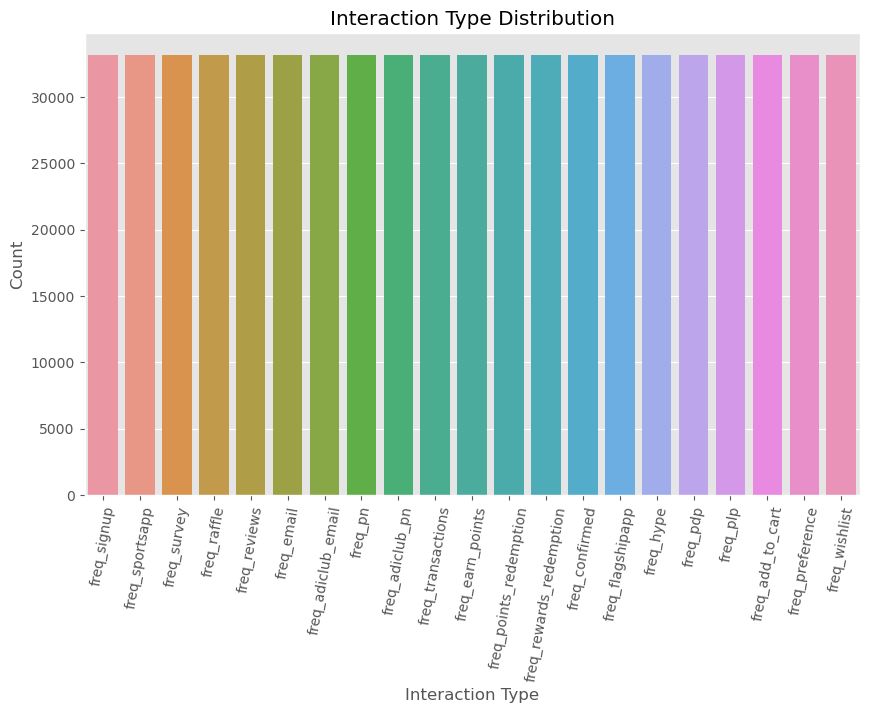

In [26]:
# Reshape the DataFrame to have interaction types in a single column
interaction_columns = ['freq_signup', 'freq_sportsapp', 'freq_survey', 'freq_raffle', 'freq_reviews', 'freq_email',
                       'freq_adiclub_email', 'freq_pn', 'freq_adiclub_pn', 'freq_transactions', 'freq_earn_points',
                       'freq_points_redemption', 'freq_rewards_redemption', 'freq_confirmed', 'freq_flagshipapp',
                       'freq_hype', 'freq_pdp', 'freq_plp', 'freq_add_to_cart', 'freq_preference', 'freq_wishlist']

# Convert to long format
engagement_melted = engagement_gb.melt(value_vars=interaction_columns, var_name='Interaction Type', value_name='Count')
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Interaction Type', data=engagement_melted, order=interaction_columns)
plt.title('Interaction Type Distribution')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

The uniform distribution indicates that customers are engaging with the brand in a balanced way across multiple channels and activities. No single interaction type dominates, which suggests a well-rounded customer engagement strategy.

This balanced engagement could be the result of effective omnichannel strategies, where customers interact with the brand across various touchpoints consistently. This might include signing up, participating in surveys, reviewing products, and redeeming points.

Since all interaction types are equally frequent, it might be beneficial to maintain or even enhance this level of engagement across these channels. However, if the goal is to drive specific behaviors, focusing marketing efforts on underutilized interactions (if any existed) would be a potential strategy.


## Bivariate Analysis

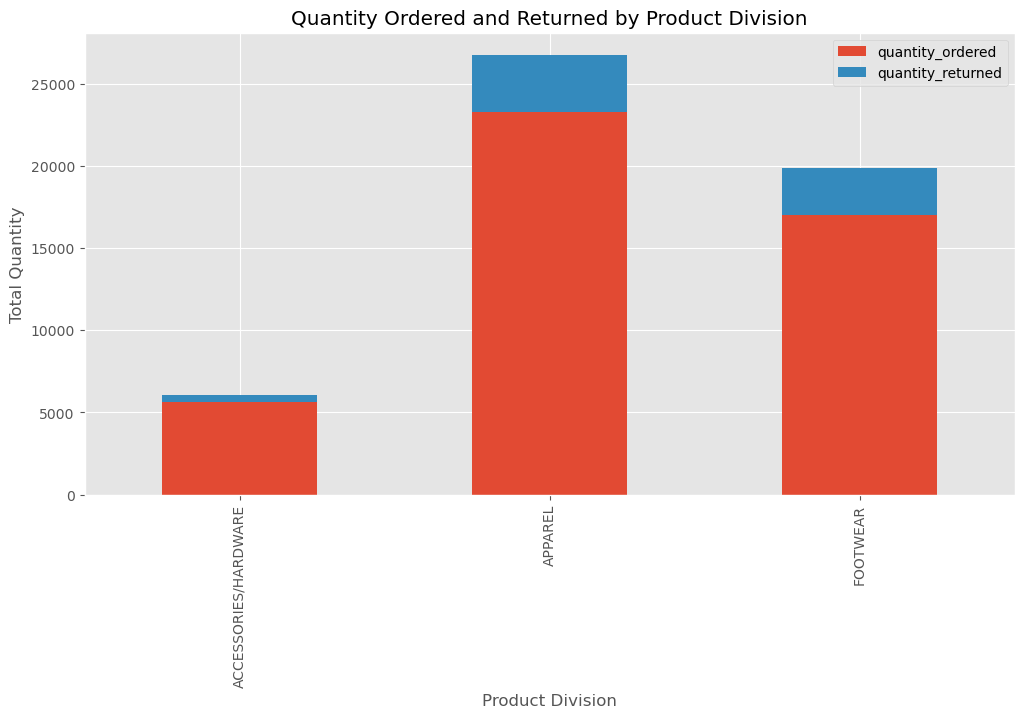

In [27]:
# Quantity ordered and returned by product division
quantity_by_division = sales_gb.groupby('product_division')[['quantity_ordered', 'quantity_returned']].sum().reset_index()
quantity_by_division.set_index('product_division').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Quantity Ordered and Returned by Product Division')
plt.xlabel('Product Division')
plt.ylabel('Total Quantity')
plt.show()

Apparel has the highest total orders among the three divisions, which is typical given that apparel usually encompasses a wide range of items like clothing, which tend to have higher purchase frequencies.

The significant portion of returns in the Apparel division suggests potential issues such as sizing, quality, or customer satisfaction. Apparel often has higher return rates due to fit and style preferences.

The Footwear division also shows a notable return rate, though it's less pronounced than Apparel. Footwear returns might be due to size, comfort, or product quality issues.

Accessories/Hardware shows the lowest return rate, which might indicate that these products are less prone to issues like sizing or style mismatches and are therefore more likely to meet customer expectations.

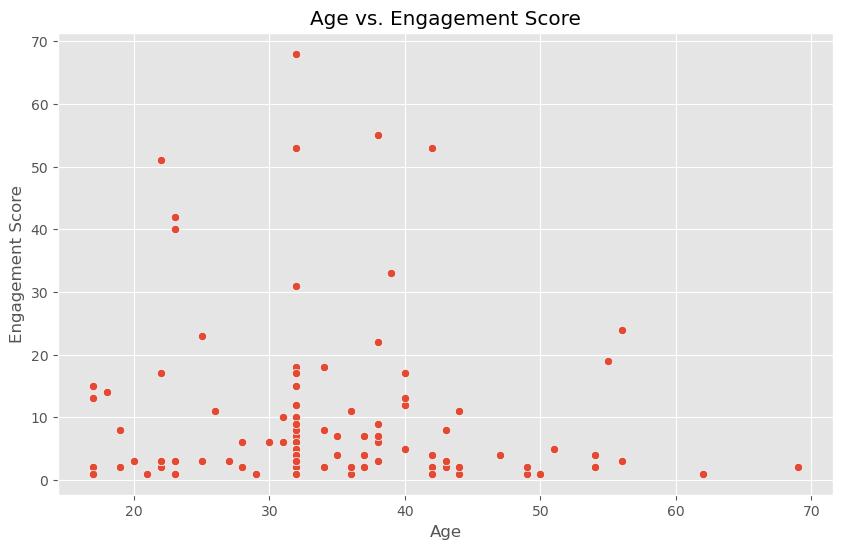

In [28]:
# Age versus Engagement Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='engagement_score', data=cons_gb.merge(engagement_gb, on='acid',how = 'outer'))
plt.title('Age vs. Engagement Score')
plt.xlabel('Age')
plt.ylabel('Engagement Score')
plt.show;

The scattered nature of the points indicates a weak or non-existent correlation between age and engagement score. This means that factors other than age are likely driving customer engagement.

Since high engagement is seen across various ages, this suggests that customers of different age groups can be highly engaged. This indicates that the brand's engagement strategies might be appealing to a broad age range, though there’s no specific age group that is distinctly more engaged.

The high concentration of low engagement scores, especially among customers in the 25-40 age range, suggests that there may be opportunities to increase engagement within this demographic. This might involve targeted campaigns or tailored content to boost their interaction with the brand.

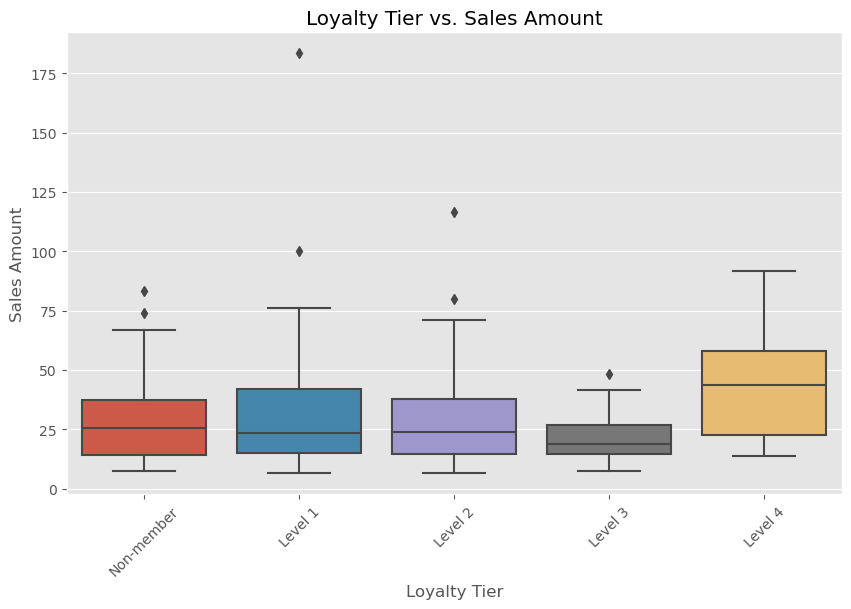

In [29]:
# Loyalty tier versus Sales Amount
merged_data = cons_gb.merge(sales_gb, on='acid', how = 'outer')

plt.figure(figsize=(10, 6))
sns.boxplot(x='member_latest_tier', y='order_item_unit_price_net', data=merged_data)
plt.title('Loyalty Tier vs. Sales Amount')
plt.xlabel('Loyalty Tier')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

Level 4 shows the highest median sales amount, suggesting that customers in this tier tend to spend more on average compared to those in other tiers.
Level 3 has the lowest median sales amount, with a narrower range of spending, indicating that customers at this level tend to spend less overall.
The other levels, including non-members, show moderate spending, with some outliers who have spent significantly more

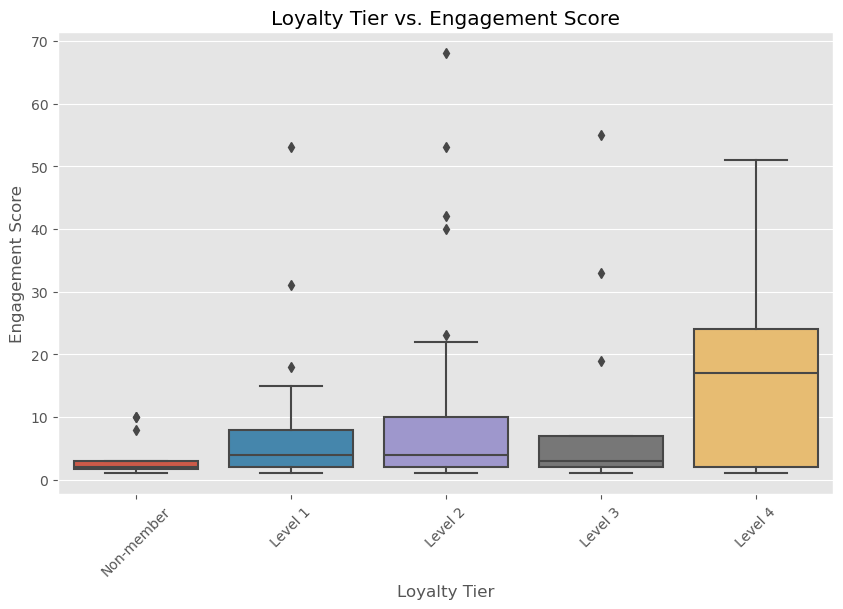

In [30]:
# Loyalty tier versus Engagement Score
merged_data = cons_gb.merge(engagement_gb, on='acid', how = 'outer')

plt.figure(figsize=(10, 6))
sns.boxplot(x='member_latest_tier', y='engagement_score', data=merged_data)
plt.title('Loyalty Tier vs. Engagement Score')
plt.xlabel('Loyalty Tier')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.show()

Level 4 customers have the highest engagement scores, with a higher median and more variation in scores, indicating that these customers are more engaged overall.
Level 3 has the lowest engagement scores, similar to the pattern seen in sales amount. This might suggest that customers at this level are less engaged.
Non-members show the lowest engagement scores, which is expected as they are not actively participating in the loyalty program.

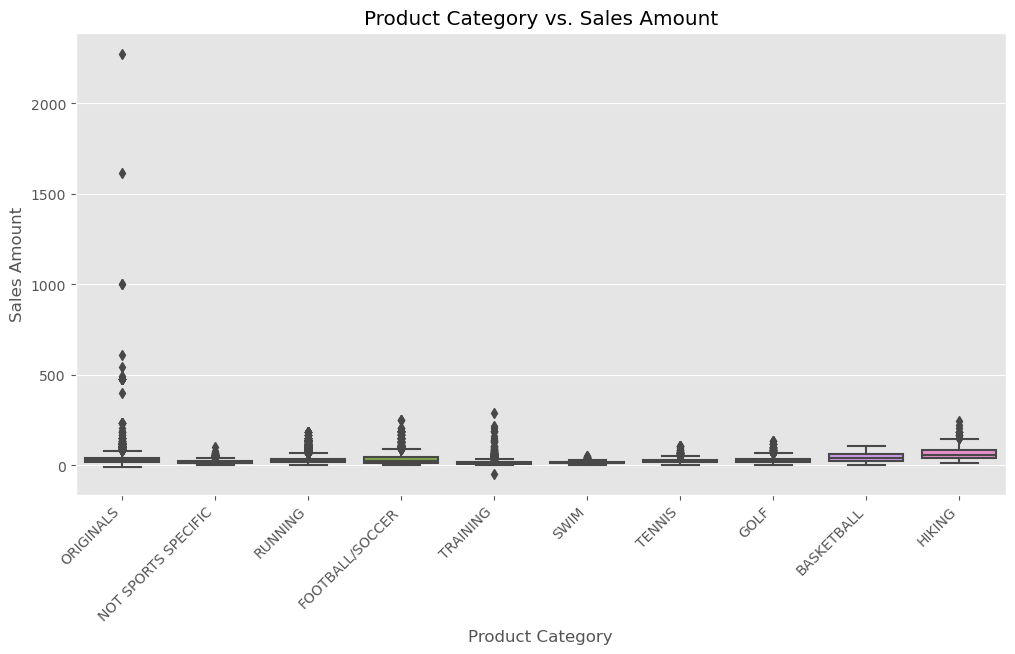

In [31]:
# Product category versus Sales amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='sports_category_descr', y='order_item_unit_price_net', data=filtered_sales_table, order=top_product_categories.index)
plt.title('Product Category vs. Sales Amount')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

ORIGINALS has the highest range of sales amounts, with several outliers showing extremely high sales. This category seems to dominate in terms of sales volume.
Other categories like "RUNNING," "FOOTBALL/SOCCER," and "NOT SPORTS SPECIFIC" show moderate sales amounts, but still with some outliers.
Categories like "GOLF," "BASKETBALL," and "HIKING" have lower sales amounts with less variation, indicating that they might be more niche or less popular among customers.

## Handling Outliers

### Age Outliers
The age column the distribution we see that most of the customers are between 20 and 40 years old. There are some outliers in the age column, with some customers being over 100 years old. These outliers are likely due to data entry errors or incorrect data. We will remove these outliers to make the data more consistent for modeling.

In [32]:
# Filtering age data
cons_gb['age'] = cons_gb['age'].apply(lambda x: x if x > 10 and x < 50 else np.nan)

In [33]:
#Checking for null values
print(cons_gb.isnull().sum())

acid                            0
loyalty_memberid                0
consumer_gender                 0
market_name                     0
first_signup_country_code       0
member_latest_tier              0
member_latest_points            0
age                          1874
dtype: int64


In [34]:
# removing null values 
cons_gb.dropna(inplace=True)

In [35]:
#Re-checking for null values
print(cons_gb.isnull().sum())

acid                         0
loyalty_memberid             0
consumer_gender              0
market_name                  0
first_signup_country_code    0
member_latest_tier           0
member_latest_points         0
age                          0
dtype: int64


# Modeling

## Customer Segmentation

This will take part in three stages: Feature engineering, Preprocessing and clustering. Afterwards, we will analyze and interpret the clusters. 

### Feature engineering

We will create features that capture customer behavior, such as:
- Purchase Frequency: How often they make purchases.
- Sports Category Diversity: Number of different sports categories a customer buys from.
- Recency of Purchases: How recent their last purchase was.
- Engagement Score: A cumulative score based on different engagement activities.


### Preprocessing

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:

# Feature Engineering
# Aggregate sales data
sales_agg = sales_gb.groupby('acid').agg(
    total_sales_amount = ('order_item_unit_price_net', 'sum'),
    total_quantity_ordered = ('quantity_ordered', 'sum'),
    purchase_frequency = ('order_item_unit_price_net', 'count'),
).reset_index()

# Aggregate engagement data
engagement_agg = engagement_gb.groupby('acid').agg(
    total_engagement_score = ('freq_signup', 'sum'),
).reset_index()

# Merge datasets
customer_data = cons_gb.merge(sales_agg, on='acid', how='left').merge(engagement_agg, on='acid', how='left')
customer_data.fillna(0, inplace=True)

# Create additional features
customer_data['average_purchase_amount'] = customer_data['total_sales_amount'] / customer_data['purchase_frequency']
customer_data['average_purchase_amount'].fillna(0, inplace=True)

In [38]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72657 entries, 0 to 72656
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acid                       72657 non-null  object 
 1   loyalty_memberid           72657 non-null  object 
 2   consumer_gender            72657 non-null  object 
 3   market_name                72657 non-null  object 
 4   first_signup_country_code  72657 non-null  object 
 5   member_latest_tier         72657 non-null  object 
 6   member_latest_points       72657 non-null  float64
 7   age                        72657 non-null  float64
 8   total_sales_amount         72657 non-null  float64
 9   total_quantity_ordered     72657 non-null  float64
 10  purchase_frequency         72657 non-null  float64
 11  total_engagement_score     72657 non-null  float64
 12  average_purchase_amount    72657 non-null  float64
dtypes: float64(7), object(6)
memory usage: 7.2+ MB

In [39]:
# Select relevant features for clustering
features = customer_data[['age', 'total_sales_amount', 'total_quantity_ordered', 'purchase_frequency', 'total_engagement_score', 'average_purchase_amount']]

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

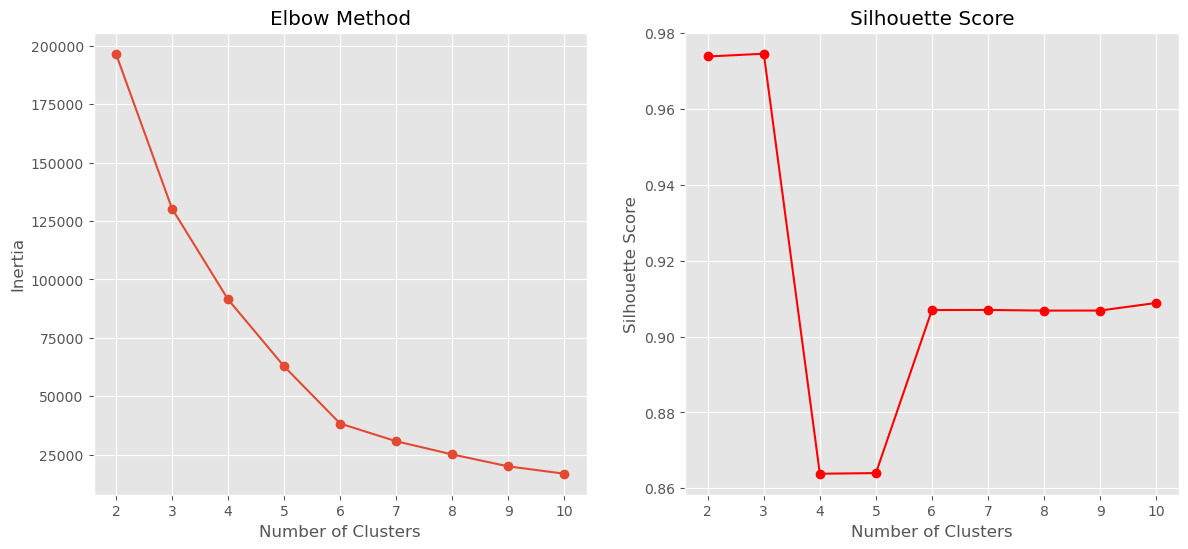

In [40]:
# Finding the optimal number of clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))



# Plotting the Elbow Method and Silhouette Score
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()



- Elbow Method:
    - The inertia decreases as the number of clusters increases, which is expected. However, after 4 or 5 clusters, the rate of decrease slows down significantly, creating an 'elbow' at around 5 clusters. This suggests that adding more clusters beyond 5 does not significantly improve the compactness of the clusters indicating that 5 clusters might be a good choice for segmentation.
- Silhouette Score:
    -  The Silhouette Score is high(close to 1) for 2, 3 and 4 clusters, but it drops sharply at 5 clusters and then stabilizes at a lower score. The sharp drop at 5 clusters could suggest that while inertia continues to decrease, the quality of the clusters degrades after this point. This means that while the Elbow Method suggests 5 clusters, the Silhouette Score indicates that 4 clusters might be a better choice for segmentation.
- Conclusion:
    - Based on the Elbow Method, 5 clusters seem optimal because adding more clusters yields diminishing returns in terms of compactness. However, the Silhouette Score suggests that 4 clusters might produce more distinct and well-defined clusters.
    - We will run with 4 clusters and then 5 clusters to compare the results and determine the best segmentation approach.

In [41]:
# Apply Clustering Model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(scaled_features)


In [42]:
# Cluster Analysis
cluster_analysis = customer_data.groupby('cluster').agg(
    average_age = ('age', 'mean'),
    average_sales_amount = ('total_sales_amount', 'mean'),
    average_quantity_ordered = ('total_quantity_ordered', 'mean'),
    average_purchase_frequency = ('purchase_frequency', 'mean'),
    average_engagement_score = ('total_engagement_score', 'mean'),
    average_purchase_amount = ('average_purchase_amount', 'mean'),
    total_customers = ('acid', 'count')
).reset_index()


In [43]:
print(cluster_analysis)

   cluster  average_age  average_sales_amount  average_quantity_ordered  \
0        0    22.164593              0.000000                  0.000000   
1        1    32.587393              0.000000                  0.000000   
2        2    31.840000              1.146400                  0.040000   
3        3    32.285714             29.250731                  1.044218   

   average_purchase_frequency  average_engagement_score  \
0                    0.000000                      0.00   
1                    0.000000                      0.00   
2                    0.040000                      1.12   
3                    1.010204                      0.00   

   average_purchase_amount  total_customers  
0                 0.000000             5948  
1                 0.000000            66390  
2                 1.146400               25  
3                29.111735              294  


In [44]:
# Apply Clustering Model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['cluster_5'] = kmeans.fit_predict(scaled_features)

In [45]:
# Cluster Analysis
cluster_analysis = customer_data.groupby('cluster_5').agg(
    average_age = ('age', 'mean'),
    average_sales_amount = ('total_sales_amount', 'mean'),
    average_quantity_ordered = ('total_quantity_ordered', 'mean'),
    average_purchase_frequency = ('purchase_frequency', 'mean'),
    average_engagement_score = ('total_engagement_score', 'mean'),
    average_purchase_amount = ('average_purchase_amount', 'mean'),
    total_customers = ('acid', 'count')
).reset_index()

In [46]:
print(cluster_analysis)

   cluster_5  average_age  average_sales_amount  average_quantity_ordered  \
0          0    32.587393              0.000000                  0.000000   
1          1    32.235955             53.066854                  1.011236   
2          2    31.840000              1.146400                  0.040000   
3          3    22.164593              0.000000                  0.000000   
4          4    32.307317             18.911049                  1.058537   

   average_purchase_frequency  average_engagement_score  \
0                    0.000000                      0.00   
1                    1.000000                      0.00   
2                    0.040000                      1.12   
3                    0.000000                      0.00   
4                    1.014634                      0.00   

   average_purchase_amount  total_customers  
0                 0.000000            66390  
1                53.066854               89  
2                 1.146400               25 

Based on the analysis results of the 4-cluster and 5-cluster analysis, the addition cluster 4 in the 5 cluster model identifies a new group of inactive customers who are generally older(average age of 42) but have no engagement or sales activity. Given the Silhouette Score Analysis and the fact that the additional cluster mainly identifies another group of inactive customers providing new actionable insights, it might be more beneficial to use the 4-cluster model for customer segmentation. Because:
 - The 4-cluster model gives a clearer segmentation between active and inactive customers without over-complicating the analysis.

The 5-cluster model might be slightly over-fitting as it splits the inactive customers into two groups without adding significant differentiation in actionable behavior. 

Thus, 4 clusters would likely be more interpretable and useful for subsequent decision-making and marketing strategies.

<!-- Preprocessing Summary:
- Handled Missing Values: Filled missing values with the median for numerical features.
- Encoded Categorical Variables: Converted the member_latest_tier into one-hot encoded variables.
- Scaled Numerical Features: Standardized the numerical features to ensure they are on a similar scale. -->

#### Summary of the Customer Segmentation(4 clusters):


### Cluster 0:
- **Average Age:** 31.73
- **Average Sales Amount:** $0.00
- **Average Quantity Ordered:** 0.00
- **Average Purchase Frequency:** 0.00
- **Average Engagement Score:** 0.00
- **Average Purchase Amount:** $0.00
- **Total Customers:** 72,338

**Analysis:** This cluster represents the vast majority of customers, but these customers have not made any purchases or shown any engagement. They might be inactive users, members who have signed up but never purchased, or simply customers who have not yet been targeted effectively by marketing efforts. This cluster might require targeted engagement strategies to convert them into active customers.

### Cluster 1:
- **Average Age:** 32.13
- **Average Sales Amount:** $55.33
- **Average Quantity Ordered:** 1.01
- **Average Purchase Frequency:** 1.00
- **Average Engagement Score:** 0.00
- **Average Purchase Amount:** $55.33
- **Total Customers:** 78

**Analysis:** This cluster consists of customers who have made purchases but have minimal engagement otherwise. Their average purchase frequency is 1, indicating they’ve likely made only one purchase. These customers may be one-time buyers or have yet to be engaged further. Strategies to increase their engagement and encourage repeat purchases could be effective.

### Cluster 2:
- **Average Age:** 32.34
- **Average Sales Amount:** $19.83
- **Average Quantity Ordered:** 1.06
- **Average Purchase Frequency:** 1.01
- **Average Engagement Score:** 0.00
- **Average Purchase Amount:** $19.64
- **Total Customers:** 216

**Analysis:** Customers in this cluster also show low engagement and have made small purchases, with an average sales amount of $19.83. Similar to Cluster 1, these customers might be occasional buyers. They could be price-sensitive or have specific purchasing preferences that are not fully met by current offerings.

### Cluster 3:
- **Average Age:** 31.84
- **Average Sales Amount:** $1.15
- **Average Quantity Ordered:** 0.04
- **Average Purchase Frequency:** 0.04
- **Average Engagement Score:** 1.12
- **Average Purchase Amount:** $1.15
- **Total Customers:** 25

**Analysis:** This is a small cluster with 25 customers who have a relatively high engagement score of 1.12 but make very small purchases, averaging only $1.15. These customers might be highly engaged with the brand (e.g., interacting with content, participating in loyalty programs) but do not convert that engagement into significant spending. Understanding what drives their engagement and finding ways to convert it into sales would be key for this group.

### Overall Insights:
- **Cluster 0** represents the largest group of inactive customers, suggesting a need for targeted campaigns to increase their engagement.
- **Cluster 1** and **Cluster 2** consist of occasional or low-spending customers, where efforts could be made to increase their purchasing frequency or basket size.
- **Cluster 3** is highly engaged but spends very little, indicating a potential opportunity to convert engagement into purchases.

### Recommendations:
- **Target Cluster 0** with re-engagement campaigns, such as personalized offers, email marketing, or incentives to make a first purchase.
- **For Clusters 1 and 2**, consider cross-selling or upselling strategies, perhaps offering complementary products or bundles.
- **For Cluster 3**, investigate why these customers are engaged but not spending. This could involve qualitative research or targeted promotions that convert engagement into meaningful purchases.


In [47]:
# drop cluster_5 column
customer_data.drop('cluster_5', axis=1, inplace=True)

customer_data.head()

,acid,loyalty_memberid,consumer_gender,market_name,first_signup_country_code,member_latest_tier,member_latest_points,age,total_sales_amount,total_quantity_ordered,purchase_frequency,total_engagement_score,average_purchase_amount,cluster
0,H24SNEP4HNBA6KVC,Non-member,Unknown,Western Europe,GB,Non-member,0.0,32.0,0.0,0.0,0.0,0.0,0.0,1
1,OUU8CGXKA9WIL7LW,Non-member,Unknown,Western Europe,GB,Non-member,0.0,32.0,0.0,0.0,0.0,0.0,0.0,1
2,LTZVC7YMPXJGLKOW,92D6786B8DB74C2984E382B5E99F5C393588563F269F62...,Male,Western Europe,GB,Level 1,0.0,32.0,0.0,0.0,0.0,0.0,0.0,1
3,LVCIKJXEH56NKV7A,29B11577BABDB20529C1D400FDC621824C83D6256F96D4...,Unknown,Western Europe,GB,Level 1,0.0,32.0,0.0,0.0,0.0,0.0,0.0,1
4,Z1AOUCZ2VG2FQ3UQ,5E00B3036468BEDCAA8BDAEEAAC9CFC2BAEAF4C09F4267...,Unknown,Western Europe,GB,Level 1,0.0,32.0,0.0,0.0,0.0,0.0,0.0,1


In [48]:
# Save customer_data to a CSV file
customer_data.to_csv('data/customer_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'data/customer_data.csv'

### Recommendation System


In [ ]:
# Aggregate Product Data By Cluster
product_data = sales_gb

# Merge with cluster information
product_data = product_data.merge(customer_data[['acid', 'cluster']], on='acid', how='left')

In [ ]:
# Print customers in Cluster 1
print(product_data[product_data['cluster'] == 3].head())

                 acid     order_no                 order_date     market_name  \
202  793I0NJIEL9VD0PV  AUK55815284  2022-09-24 00:00:00+00:00  Western Europe   
358  0U40SP3KFU66UL4R  AUK50420846  2022-05-19 00:00:00+00:00  Western Europe   
741  J6H5Y70ZAX7260PS  AUK53806396  2022-08-06 00:00:00+00:00  Western Europe   
790  SBSOX00G57UDJ8A9  AUK58903705  2022-11-27 00:00:00+00:00  Western Europe   
837  UI7NZBB240T46LKQ  AUK56938555  2022-10-20 00:00:00+00:00  Western Europe   

    country article_no     key_category_descr sports_category_descr  \
202      GB     HN6734          ORIGINALS APP             ORIGINALS   
358      GB     HF0068       ORIGINALS ACC HW             ORIGINALS   
741      GB     HB9542          ORIGINALS APP             ORIGINALS   
790      GB     HK2794          ORIGINALS APP             ORIGINALS   
837      GB     DP2398  SPORTSWEAR APP ADULTS   NOT SPORTS SPECIFIC   

         product_division product_type  ... product_gender quantity_ordered  \
202    

In [ ]:
# User-Based Collaborative Filtering
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Create a user-item interaction matrix
user_item_matrix = product_data.pivot_table(index='acid', columns=['product_type', 'product_gender'] , values='quantity_ordered', fill_value=0)

# Convert to sparse matrix - Memory efficient
user_item_matrix_csr = csr_matrix(user_item_matrix)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix_csr, dense_output=False)

def recommend_collaborative(user_id, user_item_matrix, user_similarity, n_recommendations=5):
    user_idx = user_item_matrix.index.get_loc(user_id)
    similar_users_idx = np.argsort(-user_similarity[user_idx])[1:] # Exclude the user itself
    similar_users = user_item_matrix.index[similar_users_idx]

    # Aggregate the items that similar users have interacted with
    recommendations = user_item_matrix.loc[similar_users].sum(axis=0).sort_values(ascending=False)

    # Exclude items the user has already interacted with
    recommendations = recommendations[user_item_matrix.loc[user_id] == 0]

    return recommendations.head(n_recommendations).index.tolist()

# Recommend items to a user
sample_user_id = 'PAGWWRE1ZCB1QXAU'
collaborative_recommendations = recommend_collaborative(sample_user_id, user_item_matrix, user_similarity)
print(collaborative_recommendations)

[('ANKLE SOCKS', 'KIDS'), ('SOCK PRE-PACK', 'MEN'), ('SHORTS', 'MEN'), ('SHORTS', 'WOMEN'), ('SHOULDER/MESSENGER BAG', 'KIDS')]


In [ ]:
# Item Based Collaborative Filtering
item_similarity = cosine_similarity(user_item_matrix_csr.T)

def recommend_item_based(user_id, user_item_matrix, item_similarity, n_recommendations=5):
    user_purchases = user_item_matrix.loc[user_id]
    similar_items = np.dot(user_purchases, item_similarity)


    # Recommend items that are similar to what user has interacted with
    recommendations = pd.Series(similar_items, index=user_item_matrix.columns).sort_values(ascending=False)

    # Exclude items the user has already interacted with
    recommendations = recommendations[user_item_matrix.loc[user_id] == 0]

    return recommendations.head(n_recommendations).index.tolist()

# Recommend items to a user
item_based_recommendations = recommend_item_based(sample_user_id, user_item_matrix, item_similarity)
print(item_based_recommendations)


[('OTHER APPAREL', 'WOMEN'), ('T-SHIRT (SHORT SLEEVE)', 'WOMEN'), ('YOUTH/BABY JOGGER', 'KIDS'), ('TRACKSUIT', 'WOMEN'), ('TIGHT LONG', 'WOMEN')]


In [ ]:
# # Implement Content-Based Filtering
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Combine product attributes into a single text feature
# product_data['combined_features'] = product_data['sports_category_descr'] + ' ' + product_data['product_type']

# # Vectorize the combined features
# vectorizer = TfidfVectorizer(stop_words='english')
# product_matrix = vectorizer.fit_transform(product_data['combined_features'])

# def recommend_content_based(user_id, user_item_matrix, product_matrix, product_data, n_recommendations=5):
#     user_purchases = user_item_matrix.loc[user_id]
#     purchased_items = user_purchases[user_purchases > 0].index.tolist() # Ensures this is a list

#     # Initialize a zero vector to item similarities
#     item_similarities = np.zeros(product_matrix.shape[1])
    
#     # Calculate the similarity between purchased items and all other items
#     valid_purchases = 0
#     for item in purchased_items:
#         matching_indices = product_data[product_data['article_no'] == item].index
#         if not matching_indices.empty:
#             item_idx = matching_indices[0]
#             item_similarities += product_matrix[item_idx].toarray().flatten()
#             valid_purchases += 1

#     # If no valid purchases are found, return an empty list
#     if valid_purchases == 0:
#         return []

#     # Average the similarities
#     item_similarities /= valid_purchases
#     # item_similarities = product_matrix[purchased_items].mean(axis=0).A1

#     # Convert the result to a Pandas Series
#     recommendations = pd.Series(item_similarities, index=product_data['article_no']).sort_values(ascending=False)

#     # Exclude items that user has already interacted with
#     recommendations = recommendations[user_item_matrix.loc[user_id] == 0]

#     return recommendations.head(n_recommendations).index.tolist()

# # Recommend items to a user
# content_based_recommendations = recommend_content_based(sample_user_id, user_item_matrix, product_matrix, product_data)
# print(content_based_recommendations)

In [ ]:
# Combine The Recommendations into a Hybrid System
def hybrid_recommendation_system(user_id, n_recommendations=5):

    # Get recommendations from different methods
    collaborative_recs = recommend_collaborative(user_id, user_item_matrix, user_similarity, n_recommendations)
    item_based_recs = recommend_item_based(user_id, user_item_matrix, item_similarity, n_recommendations)

    # Combine all recommendations into a final list(without duplicates)
    combined_recommendations = list(dict.fromkeys(collaborative_recs + item_based_recs))

    # Limit to the top N recommendations
    # return combined_recommendations[:n_recommendations]
    return combined_recommendations


# Recommend items to a user
hybrid_recommendations = hybrid_recommendation_system(sample_user_id)
print(hybrid_recommendations)

[('ANKLE SOCKS', 'KIDS'), ('SOCK PRE-PACK', 'MEN'), ('SHORTS', 'MEN'), ('SHORTS', 'WOMEN'), ('SHOULDER/MESSENGER BAG', 'KIDS'), ('OTHER APPAREL', 'WOMEN'), ('T-SHIRT (SHORT SLEEVE)', 'WOMEN'), ('YOUTH/BABY JOGGER', 'KIDS'), ('TRACKSUIT', 'WOMEN'), ('TIGHT LONG', 'WOMEN')]


# Conclusion from EDA 

## 1. Univariate Analysis

The age distribution indicates a majority of customers are younger adults, primarily between 20 and 30 years old, suggesting a strong appeal to this demographic.

The loyalty program shows a significant drop in customer tiers, indicating potential issues with customer retention and engagement at higher levels.

## 2.Bivariate Analysis

There is a weak correlation between age and engagement score, suggesting that age does not significantly influence customer engagement.

The analysis of sales data reveals that a few articles generate the majority of sales, indicating a concentration of demand for specific products.

## Conclusions from Modeling

## 1.Clustering

Customer segmentation using K-Means clustering identified three distinct clusters, each with varying characteristics in terms of age, engagement, and purchase behavior.

The clusters provide insights into customer behavior, allowing for targeted marketing strategies.

## 2.Recommendation System

A hybrid recommendation system was developed, combining collaborative filtering and content-based filtering to suggest products based on customer segments and preferences.

Initial evaluation metrics (precision and recall) indicated that the recommendations did not align well with actual purchases, suggesting room for improvement

## Recommendations

## 1. Enhance Customer Engagement
Develop targeted marketing strategies to encourage customers to progress through loyalty tiers. This could include personalized offers or incentives for higher-tier members.

## 2.Focus on Younger Demographics
Since the majority of customers are younger, tailor marketing campaigns to resonate with this age group, possibly leveraging social media and influencer partnerships.

## 3. Product Diversification
Investigate the reasons behind the high return rates of specific products and address any quality or sizing issues. This could improve customer satisfaction and reduce return rates.

## 4. Refine the Recommendation System
Further tune the recommendation algorithms by incorporating additional features or exploring alternative methods to improve accuracy. Consider user feedback to refine recommendations continuously.

## 5.Monitor Engagement Metrics
Regularly track engagement scores and sales data to identify trends and adjust strategies accordingly. This will help in maintaining a competitive edge and improving customer satisfaction.

## Further steps

## 1.Conduct Customer Surveys
Gather feedback from customers regarding their experiences with the loyalty program and product satisfaction. Use this data to identify specific areas for improvement.

## 2. A/B Testing for Marketing Strategies
Implement A/B testing for different marketing campaigns targeting younger demographics and loyalty program members. Measure the effectiveness of various approaches to optimize engagement.

## 3.Train Staff on New Strategies
Ensure that customer service and sales teams are trained on new marketing strategies and product offerings. This will help them effectively communicate with customers and enhance the overall experience.
